In [ ]:
"""
Here I will give assignment to the layover values under additional info from the new variable created 'total_air_time'

"""

In [1]:
## libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
## connecting to the db

conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

# calling the flights table and saving as a df

query = '''

SELECT * from flights_cleaned

'''

df = pd.read_sql_query(query, conn)
conn.close()

df

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num,total_air_time,layover_time
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,170,0,3,32,32,32,32,1,169.061918,0.938082
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,445,2,23,7,0,32,32,2,261.972956,183.027044
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,1140,3,30,1,10,32,32,3,322.952098,817.047902
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,325,2,31,0,32,32,32,4,221.744739,103.255261
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,285,0,31,3,32,32,32,5,214.054312,70.945688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,150,2,0,32,32,32,32,6,155.347938,-5.347938
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,155,2,0,32,32,32,32,6,155.347938,-0.347938
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,180,0,3,32,32,32,32,1,169.061918,10.938082
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,160,0,3,32,32,32,32,1,169.061918,-9.061918


In [3]:
# onehot encoding 
df= pd.get_dummies(df, columns=['additional_info'], dtype=int)

df 

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0.938082,0,0,0,0,0,0,0,1,0
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,183.027044,0,0,0,0,0,0,0,1,0
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,817.047902,0,0,0,0,0,0,0,1,0
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,103.255261,0,0,0,0,0,0,0,1,0
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,70.945688,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,-5.347938,0,0,0,0,0,0,0,1,0
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,-0.347938,0,0,0,0,0,0,0,1,0
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,10.938082,0,0,0,0,0,0,0,1,0
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,-9.061918,0,0,0,0,0,0,0,1,0


In [ ]:
## we are looking to assign values to...
# 1.) additional_info_1 long layover
# 2.) additional_info_1 short layover
# 3.) additional_info_2 long layover 

In [ ]:
# looking at the layout of the features it's safe to assume that...
# 1.) a flight can have no more than 3 layover opportunities 
# 2.) there is most likely a 2 short layover category
# 2.) there could be a high frequency of flights with multiple layover options

In [ ]:
"""
1 long layover
"""

In [5]:
layover_long1 = df[df['additional_info_1 long layover']==1]
layover_long1

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
1043,air india,0,3.0,2,14594,1,3,2019,19,50,...,231.893335,1,0,0,0,0,0,0,0,0
2079,air india,0,3.0,2,14752,1,3,2019,20,30,...,969.447221,1,0,0,0,0,0,0,0,0
2405,jet airways,0,3.0,2,22270,1,3,2019,7,40,...,825.597905,1,0,0,0,0,0,0,0,0
2481,air india,0,3.0,2,12599,1,3,2019,23,55,...,1174.447221,1,0,0,0,0,0,0,0,0
2495,jet airways,0,3.0,2,26890,1,3,2019,7,40,...,655.597905,1,0,0,0,0,0,0,0,0
2556,jet airways,0,3.0,2,25735,1,3,2019,10,25,...,820.597905,1,0,0,0,0,0,0,0,0
3111,jet airways,0,3.0,2,27992,1,3,2019,21,20,...,350.597905,1,0,0,0,0,0,0,0,0
3700,jet airways,0,3.0,2,31825,1,3,2019,9,30,...,410.597905,1,0,0,0,0,0,0,0,0
3788,air india,0,3.0,2,15434,1,3,2019,13,0,...,1276.307175,1,0,0,0,0,0,0,0,0
4521,jet airways,0,3.0,2,25735,1,3,2019,9,0,...,735.597905,1,0,0,0,0,0,0,0,0


In [8]:
# comparing the mean duration times

print(layover_long1['total_dur'].mean())
print(layover_long1['total_air_time'].mean())
print(layover_long1['layover_time'].mean())

919.4736842105264
232.45435174041057
687.0193324701158


In [10]:
print(layover_long1['price'].mean())
print(layover_long1['price'].median())


22109.63157894737
25735.0


In [73]:
layover_long1['layover_time'].describe()

count      19.000000
mean      687.019332
std       303.757502
min       231.893335
25%       439.595642
50%       660.597905
75%       897.522563
max      1276.307175
Name: layover_time, dtype: float64

In [11]:
layover_long1['price'].describe()

count       19.000000
mean     22109.631579
std       8040.051155
min       7744.000000
25%      14673.000000
50%      25735.000000
75%      27992.000000
max      31825.000000
Name: price, dtype: float64

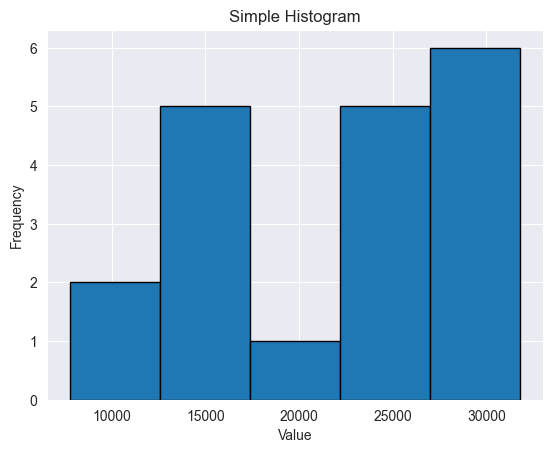

In [12]:
plt.hist(layover_long1['price'], bins=5, edgecolor='black')

# Add title and labels
plt.title('1 Long Layover Price Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

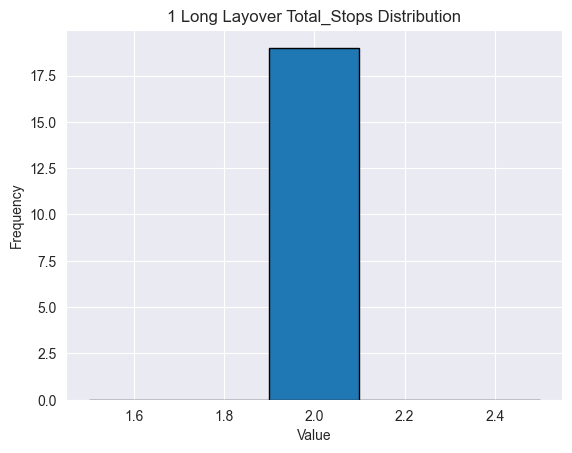

In [13]:
plt.hist(layover_long1['total_stops'], bins=5, edgecolor='black')

# Add title and labels
plt.title('1 Long Layover Total_Stops Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# currently, 1 long layovers are classified with exactly 1 stop

In [15]:
layover_long1['airline'].unique()

array(['air india', 'jet airways', 'spicejet'], dtype=object)

In [ ]:
# only 3 airlines are associated with 1 long layover

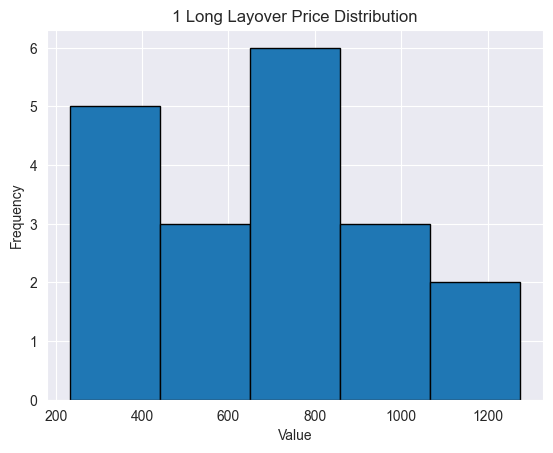

In [16]:
plt.hist(layover_long1['layover_time'], bins=5, edgecolor='black')

# Add title and labels
plt.title('1 Long Layover Price Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
# I need to determine which of our current features best explain 1 long flight.

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Convert all columns except 'additional_info_1 long layover' to numeric
for col in layover_long1.columns.drop('additional_info_1 long layover'):
    layover_long1[col] = pd.to_numeric(layover_long1[col], errors='coerce')



# Split the dataset into groups based on the 'additional_info_1 long layover' feature
groups = layover_long1['additional_info_1 long layover'].unique()
data_grouped = {group: layover_long1[layover_long1['additional_info_1 long layover'] == group] for group in groups}

# Checking for normality using Shapiro-Wilk test
normality_results = {}
for feature in layover_long1.columns.drop('additional_info_1 long layover'):
    group_results = {}
    for group in groups:
        group_data = data_grouped[group][feature].dropna()
        if len(group_data) > 3:  # Shapiro-Wilk requires at least 3 data points
            stat, p_value = stats.shapiro(group_data)
            group_results[group] = p_value
        else:
            group_results[group] = None
    normality_results[feature] = group_results

# Display results
print("Shapiro-Wilk Test p-values for Normality:")
for feature, group_results in normality_results.items():
    print(f"{feature}: {group_results}")


Shapiro-Wilk Test p-values for Normality:
airline: {1: None}
source: {1: 5.280437864740861e-09}
destination: {1: 5.280437864740861e-09}
total_stops: {1: 1.0}
price: {1: 0.047239311039447784}
day: {1: 5.280437864740861e-09}
month: {1: 5.280437864740861e-09}
year: {1: 1.0}
arv_hour: {1: 0.008229206316173077}
arv_min: {1: 0.1505814790725708}
dep_hour: {1: 0.18332484364509583}
dep_min: {1: 0.000805415736977011}
dur_hour: {1: 0.40658891201019287}
dur_min: {1: 0.03856006637215614}
total_dur: {1: 0.5853508710861206}
start: {1: 5.280437864740861e-09}
stop_1: {1: 1.847938506216451e-06}
stop_2: {1: 5.280437864740861e-09}
stop_3: {1: 1.0}
stop_4: {1: 1.0}
stop_5: {1: 1.0}
route_num: {1: 7.354955596383661e-05}
total_air_time: {1: 2.0254633454896975e-06}
layover_time: {1: 0.6802494525909424}
additional_info_1 short layover: {1: 1.0}
additional_info_2 long layover: {1: 1.0}
additional_info_business class: {1: 1.0}
additional_info_change airports: {1: 1.0}
additional_info_in-flight meal not included:

C:\Users\Epicm\AppData\Local\Temp\ipykernel_36160\2944174558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layover_long1[col] = pd.to_numeric(layover_long1[col], errors='coerce')
C:\Users\Epicm\Desktop\data_bases\descriptive_stats_exploratory_anlysis\.venv\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [33]:
# our results from the Shapiro-Wilk test suggest that both 'total_dur' (p-value = 0.585) & 'layover_time'(p-value = .680) that the data does not significantly deviate from a normal distribution. This finding allows us to parametric statistical methods (ANOVA)

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight


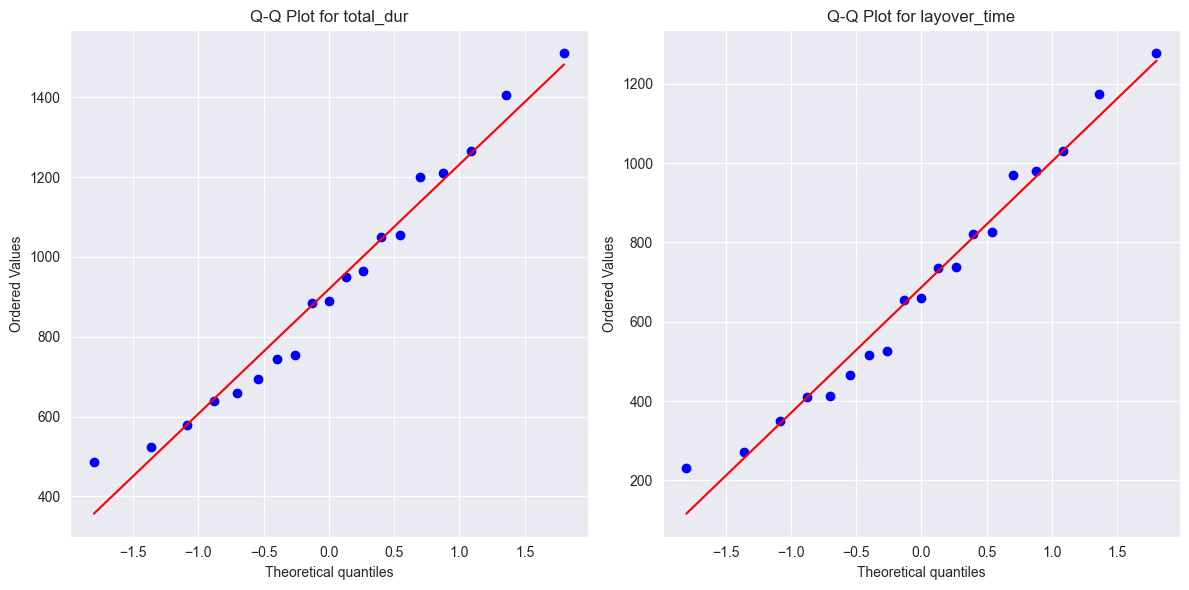

In [7]:
features = ['total_dur', 'layover_time']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1)
    stats.probplot(layover_long1[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# further supported by QQplots

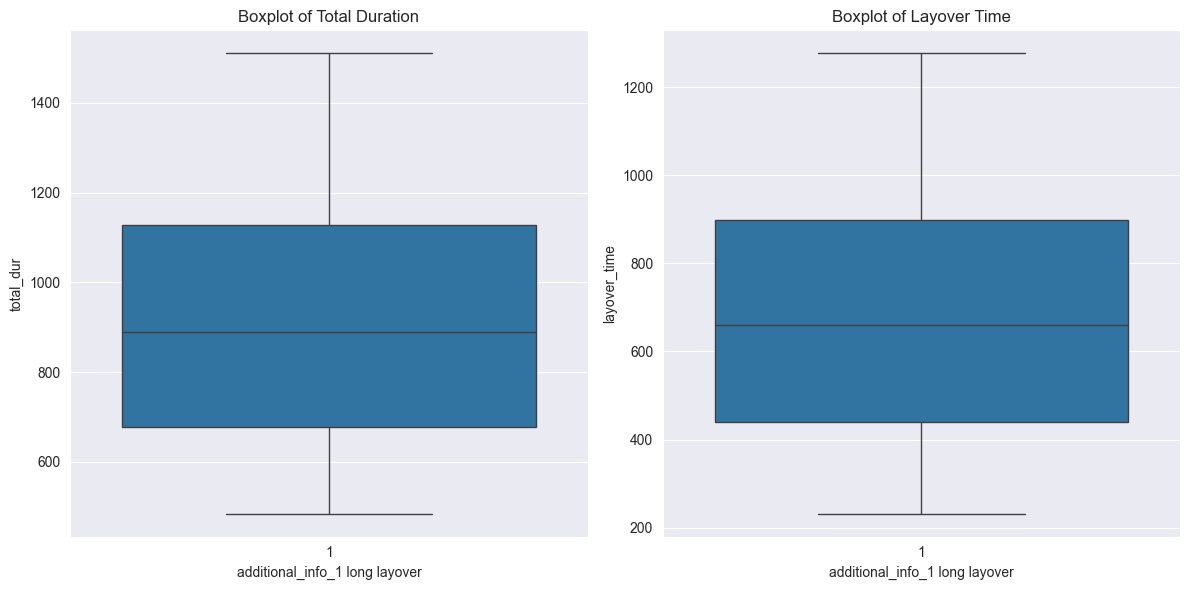

In [8]:
# homegineity with boxplots
# could also do levene's test

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming layover_long1 is the DataFrame with the data
# Example columns: 'total_dur' and 'layover_time'

# Create a boxplot for 'total_dur'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='additional_info_1 long layover', y='total_dur', data=layover_long1)
plt.title('Boxplot of Total Duration')

# Create a boxplot for 'layover_time'
plt.subplot(1, 2, 2)
sns.boxplot(x='additional_info_1 long layover', y='layover_time', data=layover_long1)
plt.title('Boxplot of Layover Time')

plt.tight_layout()
plt.show()

In [55]:
# the uniformity of the box heights suggests homogeneity of the vairances for total_dur and layover time 

In [9]:
from scipy.stats import f_oneway
import pandas as pd

# Specify the features you want to test
features = ['total_dur', 'layover_time']

# Prepare the results dictionary
anova_results = {}

# Perform ANOVA for each specified feature
for feature in features:
    # Get the groups for the current feature
    groups = [group[feature].dropna() for name, group in df.groupby('additional_info_1 long layover')]
    
    # Filter out empty groups (groups with no data points)
    non_empty_groups = [group for group in groups if len(group) > 0]
    
    # Ensure there are at least two groups with data
    if len(non_empty_groups) > 1:
        # Perform the ANOVA
        stat, p_value = f_oneway(*non_empty_groups)
        anova_results[feature] = p_value
    else:
        anova_results[feature] = 'Insufficient data'

# Display the results
print("\nANOVA p-values:")
for feature, p_value in anova_results.items():
    print(f"{feature}: {p_value}")



ANOVA p-values:
total_dur: 0.017562556836567045
layover_time: 0.009892668430482764


In [70]:
# so now in our original dataframe, any layover_time over 231 is labeled as 1 long layover
# inversely, everything under 231 will be our 1 short layovers

layover_long1

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
1043,air india,0,3.0,2,14594,1,3,2019,19,50,...,231.893335,1,0,0,0,0,0,0,0,0
2079,air india,0,3.0,2,14752,1,3,2019,20,30,...,969.447221,1,0,0,0,0,0,0,0,0
2405,jet airways,0,3.0,2,22270,1,3,2019,7,40,...,825.597905,1,0,0,0,0,0,0,0,0
2481,air india,0,3.0,2,12599,1,3,2019,23,55,...,1174.447221,1,0,0,0,0,0,0,0,0
2495,jet airways,0,3.0,2,26890,1,3,2019,7,40,...,655.597905,1,0,0,0,0,0,0,0,0
2556,jet airways,0,3.0,2,25735,1,3,2019,10,25,...,820.597905,1,0,0,0,0,0,0,0,0
3111,jet airways,0,3.0,2,27992,1,3,2019,21,20,...,350.597905,1,0,0,0,0,0,0,0,0
3700,jet airways,0,3.0,2,31825,1,3,2019,9,30,...,410.597905,1,0,0,0,0,0,0,0,0
3788,air india,0,3.0,2,15434,1,3,2019,13,0,...,1276.307175,1,0,0,0,0,0,0,0,0
4521,jet airways,0,3.0,2,25735,1,3,2019,9,0,...,735.597905,1,0,0,0,0,0,0,0,0


In [91]:
oll = df[(df['layover_time'] > 231) & (df['total_stops'] == 2)]
oll

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
6,jet airways,0,3.0,2,11087,12,3,2019,10,25,...,700.597905,0,0,0,0,0,1,0,0,0
7,jet airways,0,3.0,2,22270,1,3,2019,5,5,...,1035.597905,0,0,0,0,0,0,0,1,0
8,jet airways,0,3.0,2,11087,12,3,2019,10,25,...,1300.597905,0,0,0,0,0,1,0,0,0
10,air india,3,10.0,2,8907,1,6,2019,23,0,...,556.962669,0,0,0,0,0,0,0,1,0
13,jet airways,2,0.0,2,9663,9,5,2019,9,20,...,464.281940,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,jet airways,3,10.0,2,10262,12,6,2019,19,0,...,1238.593380,0,0,0,0,0,1,0,0,0
10665,jet airways,0,3.0,2,11087,12,3,2019,20,20,...,1055.597905,0,0,0,0,0,1,0,0,0
10667,air india,3,10.0,2,9929,15,6,2019,19,15,...,428.593380,0,0,0,0,0,0,0,1,0
10672,jet airways,0,3.0,2,11087,12,3,2019,21,20,...,1255.597905,0,0,0,0,0,1,0,0,0


In [ ]:
# 4133 entries meet the 1 long_layover layover_time floor

In [94]:
# checking for unique destination values

oll['destination'].unique()

array([ 3., 10.,  0., 16.])

In [95]:
# checking for unique source values 

oll['source'].unique()

array([0, 3, 2, 1], dtype=int64)

In [98]:
# pulling all the entries that are less 231 in total_dur and exactly 2 stops
# 2 short layovers 

osl = df[(df['layover_time'] < 231) & (df['total_stops'] == 2)]
osl

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,103.255261,0,0,0,0,0,0,0,1,0
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,70.945688,0,0,0,0,0,0,0,1,0
9,multiple carriers,3,10.0,2,8625,27,5,2019,19,15,...,223.593380,0,0,0,0,0,0,0,1,0
16,spicejet,3,10.0,2,5830,15,4,2019,13,15,...,28.243935,0,0,0,0,0,0,0,1,0
20,goair,3,10.0,2,19495,6,3,2019,19,20,...,63.593380,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634,jet airways,2,0.0,2,14388,15,5,2019,12,0,...,64.281940,0,0,0,0,0,0,0,1,0
10641,multiple carriers,3,10.0,2,7670,18,5,2019,1,30,...,143.593380,0,0,0,0,0,0,0,1,0
10648,jet airways,2,0.0,2,12384,15,5,2019,18,0,...,198.179355,0,0,0,0,0,1,0,0,0
10649,multiple carriers,3,10.0,2,10678,27,6,2019,12,35,...,213.593380,0,0,0,0,0,0,0,1,0


In [ ]:
# 1492 entries meet the 1 short layover criteria at this point

In [99]:
osl['destination'].unique()

array([ 0.,  3., 10., 16.])

In [100]:
osl['source'].unique()

array([2, 0, 3, 1], dtype=int64)

In [ ]:
"""
2 long layovers
"""

In [ ]:
# now we need to think about 2 long layovers and how to assign in

In [82]:
df[df['additional_info_2 long layover'] == 1]

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
10509,air india,0,3.0,3,26480,1,3,2019,9,25,...,1319.971341,0,0,1,0,0,0,0,0,0


In [ ]:
# assume at least 3 total stops
# the only entries' layover_time = 1319.97

In [101]:
# pulling all the flights with a layover time 1319 or greater at exactly 3 stops (exactly 2 layovers)

tll = df[(df['layover_time'] >= 1319) & (df['total_stops'] == 3)]
tll

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
108,air india,3,10.0,3,11596,9,5,2019,19,15,...,1521.816852,0,0,0,0,0,0,0,1,0
209,jet airways,3,10.0,3,15129,18,5,2019,4,25,...,1466.596489,0,0,0,0,0,0,0,1,0
226,jet airways,3,10.0,3,18799,3,3,2019,18,50,...,1953.807944,0,0,0,0,0,0,0,1,0
291,air india,3,10.0,3,8708,21,3,2019,19,15,...,1503.788006,0,0,0,0,0,0,0,1,0
344,air india,3,10.0,3,9968,9,4,2019,19,15,...,1521.816852,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,jet airways,3,10.0,3,20694,6,3,2019,18,50,...,2566.596489,0,0,0,0,0,0,0,1,0
10509,air india,0,3.0,3,26480,1,3,2019,9,25,...,1319.971341,0,0,1,0,0,0,0,0,0
10553,air india,2,0.0,3,12723,1,5,2019,12,30,...,1489.396655,0,0,0,0,0,0,0,1,0
10614,jet airways,3,10.0,3,13014,1,6,2019,12,35,...,1325.876321,0,0,0,0,0,0,0,1,0


In [ ]:
# 282 entries meet  the parameters of our single entry

In [102]:
# pulling all the flights with a layover time 1319 or greater at 4 stops or more 
# at least 2 long layovers and 1 shot layover

cll = df[(df['layover_time'] >= 1319) & (df['total_stops'] >= 4)]
cll

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
919,air india,2,0.0,4,10991,12,5,2019,23,15,...,1694.264566,0,0,0,0,0,0,0,1,0
1665,air india,0,3.0,4,12346,1,3,2019,12,15,...,1363.867603,0,0,0,0,0,0,0,1,0
2172,air india,3,10.0,4,10703,18,5,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0
2623,air india,1,16.0,4,18293,12,3,2019,15,15,...,1418.400089,0,0,0,0,0,0,0,1,0
2718,air india,3,10.0,4,15586,9,3,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0
3496,air india,0,3.0,4,13387,12,3,2019,18,5,...,1798.111812,0,0,0,0,0,0,0,1,0
3815,air india,3,10.0,4,9128,21,3,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0
4118,air india,3,10.0,4,10703,15,6,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0
4463,air india,3,10.0,4,10703,1,6,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0
4655,air india,3,10.0,4,10703,27,6,2019,19,15,...,1895.002887,0,0,0,0,0,0,0,1,0


In [ ]:
# 19 entries meet these criteria

In [103]:
# these are all my flights with 4 or more stops that are less than the 2 long layover criteria
# 1 long layover and 2 short layovers or more

csl = df[(df['layover_time'] < 1319) & (df['total_stops'] >= 4)]
csl

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,layover_time,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight
402,air india,3,10.0,4,10493,15,6,2019,7,40,...,1200.002887,0,0,0,0,0,0,0,1,0
1218,air india,3,10.0,4,11543,27,6,2019,7,40,...,1200.002887,0,0,0,0,0,0,0,1,0
2633,multiple carriers,3,10.0,4,21829,6,3,2019,21,0,...,226.107287,0,0,0,0,0,0,0,1,0
2814,air india,0,3.0,4,13387,12,3,2019,18,5,...,1158.111812,0,0,0,0,0,0,0,1,0
2822,air india,2,0.0,4,13007,24,5,2019,10,30,...,1005.223955,0,0,0,0,0,0,0,1,0
3157,multiple carriers,3,10.0,4,16294,15,5,2019,21,0,...,226.107287,0,0,0,0,0,0,0,1,0
3220,air india,2,0.0,4,12797,6,5,2019,10,30,...,1005.223955,0,0,0,0,0,0,0,1,0
3317,multiple carriers,3,10.0,4,21829,3,3,2019,21,0,...,226.107287,0,0,0,0,0,0,0,1,0
3568,air india,2,0.0,4,14960,21,5,2019,23,15,...,326.856312,0,0,0,0,0,0,0,1,0
3584,multiple carriers,3,10.0,4,16294,15,5,2019,1,30,...,496.107287,0,0,0,0,0,0,0,1,0


In [ ]:
"""
WHAT WE NEED TO ADD
"""

In [ ]:
# 2 short layovers column
# assign the values for all the layovers.

In [10]:
# creating the 2 short layover column

df['2_short_layovers'] = ((df['layover_time'] < 231) & (df['total_stops'] == 2)).astype(int)

df

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,1,0,0
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,0,1,0,0
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,0,1,0,0
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,0,0,0,0,0,0,0,1,0,1
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,0,0,0,0,0,0,0,1,0,0
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,0,0,0,0,0,0,0,1,0,0
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,0,0,0,0,0,0,0,1,0,0
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# one short layover assignment 

condition = (df['total_stops'] == 2) & (df['layover_time'] < 231) 
df.loc[condition, 'additional_info_1 short layover'] = 1

df

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,1,0,0
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,0,1,0,0
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,0,1,0,0
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,0,1,0,0,0,0,0,1,0,1
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,0,0,0,0,0,0,0,1,0,0
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,0,0,0,0,0,0,0,1,0,0
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,0,0,0,0,0,0,0,1,0,0
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# assignment of 2 long layover and 1 short layover

condition = (df['layover_time'] >= 1319) & (df['total_stops'] >= 4)

df.loc[condition, 'additional_info_1 short layover'] = 1
df.loc[condition, 'additional_info_2 long layover'] = 1

df

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 long layover,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,1,0,0
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,0,1,0,0
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,0,1,0,0
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,0,1,0,0,0,0,0,1,0,1
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,0,0,0,0,0,0,0,1,0,0
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,0,0,0,0,0,0,0,1,0,0
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,0,0,0,0,0,0,0,1,0,0
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# assignment of 1 long layover and 2 short layover

In [13]:
condition = (df['layover_time'] <= 1319) & (df['total_stops'] >= 4)

df.loc[condition, 'additional_info_2 short layover'] = 1
df.loc[condition, 'additional_info_1 long layover'] = 1

df

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers,additional_info_2 short layover
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,1,0,0,NaN
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,1,0,0,NaN
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,1,0,0,NaN
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,1,0,0,0,0,0,1,0,1,NaN
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,1,0,0,0,0,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,0,0,0,0,0,0,1,0,0,NaN
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,0,0,0,0,0,0,1,0,0,NaN
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,0,0,0,0,0,0,1,0,0,NaN
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,0,0,0,0,0,0,1,0,0,NaN


In [ ]:
# updating flights_cleaned

In [14]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

table_name = 'flights_cleaned'
df.to_sql(table_name, conn, if_exists='replace', index=False)

conn.close()

In [15]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

# calling the flights table and saving as a df

query = '''

SELECT * from flights_cleaned

'''

df = pd.read_sql_query(query, conn)
conn.close()

df

,airline,source,destination,total_stops,price,day,month,year,arv_hour,arv_min,...,additional_info_1 short layover,additional_info_2 long layover,additional_info_business class,additional_info_change airports,additional_info_in-flight meal not included,additional_info_no check-in baggage included,additional_info_no info,additional_info_red-eye flight,2_short_layovers,additional_info_2 short layover
0,indigo,0,3.0,1,3897,24,3,2019,1,10,...,0,0,0,0,0,0,1,0,0,NaN
1,air india,2,0.0,3,7662,1,5,2019,13,15,...,0,0,0,0,0,0,1,0,0,NaN
2,jet airways,3,10.0,3,13882,9,6,2019,4,25,...,0,0,0,0,0,0,1,0,0,NaN
3,indigo,2,0.0,2,6218,12,5,2019,23,30,...,1,0,0,0,0,0,1,0,1,NaN
4,indigo,0,3.0,2,13302,1,3,2019,21,35,...,1,0,0,0,0,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,4107,9,4,2019,22,25,...,0,0,0,0,0,0,1,0,0,NaN
10677,air india,2,0.0,1,4145,27,4,2019,23,20,...,0,0,0,0,0,0,1,0,0,NaN
10678,jet airways,0,3.0,1,7229,27,4,2019,11,20,...,0,0,0,0,0,0,1,0,0,NaN
10679,vistara,0,3.0,1,12648,1,3,2019,14,10,...,0,0,0,0,0,0,1,0,0,NaN
